## 9.1 주성분을 사용해 특성 줄이기
일련의 특성이 주어졌을 때 데이터의 분산을 유지하면서 특성의 수를 줄이고 싶습니다.

사이킷런의 PCA를 사용해 주성분 분석을 수행합니다.


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듭니다.
pca = PCA(n_components=0.99, whiten=True)

# PCA를 수행합니다.
features_pca = pca.fit_transform(features)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


주성분 분석(PCA)은 인기가 많은 선형 차원 축소 기법입니다. PCA는 대부분의 분산을 유지하는 특성 행렬의 (아마도 특성보다 더 적은 수의) 주성분에 샘플을 투영합니다. PCA는 비지도 학습 기법입니다. 즉 타깃 벡터의 정보를 사용하지 않고 특성 행렬만 이용합니다.

특성을 줄이는 한 가지 방법은 이 2D 공간의 모든 샘플을 1차원 주성분에 투영하는 것입니다. 두 번째 주성분에 있는 정보는 잃겠지만 때로는 받아들일 만한 상황일 수 있습니다. 이것이 PCA입니다.

사이킷런은 pca 객체의 메서드에 PCA를 구현했습니다. n_components의 입력 매개변수에 따라 두 가지 동작을 수행합니다. 만약 매개변수값이 1보다 크면 n_components 개수만큼의 특성이 반환됩니다. 이때 최적의 특성 개수를 어떻게 선택할지 의문이 들 수 있죠. 다행히 ncomponents를 0과 1사이로 지정하면 pca는 해당 비율의 분산을 유지할 수 있는 최소한의 특성 개수를 반환합니다. 0.95와  0.99가 자주 사용됩니다. 원본 특성의 95%와 99%의 분산을 유지한다는 의미입니다. whiten=True로 지정하면 각 주성분의 값을 평균이 0이고 분산이 1이 되도록 변환합니다. solver="randomized"는 아주 짧은 시간 안에 첫 번째 주성분을 찾아주는 확률적 알고리즘을 사용합니다.

해결의 출력은 PCA가 10개의 차원을 감소하면서 특성 행렬의 정보(분산)를 99% 유지했다는 것을 보여줍니다.

whitening은 주성분에 투영된 특성의 스케일을 맞추는 역할을 합니다. PCA는 평균을 0으로 맞추기 때문에 화이트닝 옵션 대신 나중에 투영된 특성을 표준화해도 됩니다.

해결에서 사용한 load_digit 함수는 8$\times$8 크기의 손글씨 숫자 데이터를 로드합니다. 주성분에 투영된 처음 두 개의 특성을 사용해 산점도를 그려보겠습니다.

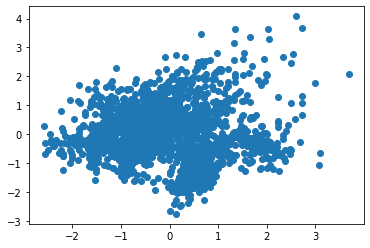

In [2]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()

화이트닝되었기 때문에 두 특성의 스케일이 비슷합니다. PCA 클래스의 whiten 매개변수의 기본값은 False입니다. 화이트닝을 적용하지 않으면 평균은 0이지만 스케일은 맞춰지지 않습니다.

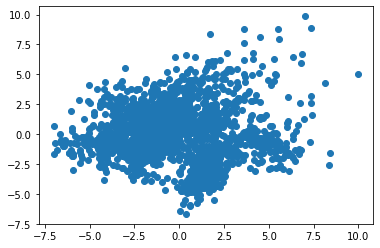

In [3]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

PCA로 찾은 주성분은 components_ 속성에 저장되어 있습니다. 해결에서 찾은 주성분은 행을 따라 54개가 놓여 있습니다. 각 주성분은 원본 특성 공간에서 어떤 방향을 나타내므로 이 벡터크기는 64입니다.

In [5]:
pca_nowhiten.components_.shape

(54, 64)

특성 행렬을 주성분에 투영하려면 components_ 배열을 전치하여 점곱하면 됩니다. 넘파이 allclose 함수를 사용하여 앞서 구한 features_nowhiten 배열과 동일한지 확인해보죠.

In [6]:
import numpy as np

np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

True

적절한 분산 비율을 선택하기 위해 전체 주성분의 설명된 분산(explained variance)에서 유지되는 분산의 양이 크게 늘어나지 않는 지점을 찾을 수 있습니다. n_components 매개변수를 지정하지 않으면 특성 개수만큼 주성분이 만들어집니다. 주성분에 의해 설명된 분산은 explained_variance_ratio_ 속성에 저장되어 있습니다.

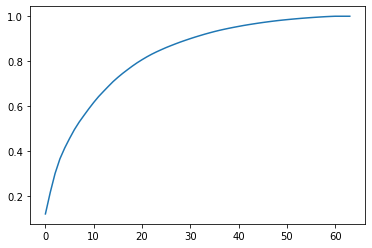

In [7]:
pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

넘파이의 cumsum 함수를 사용하여 분산을 누적하여 그래프를 그렸습니다. 여기에서는 대략 30개의 주성분으로도 80% 이상의 분산을 유지하고 있습니다. 그 이후부터 증가 추세가 꺾이고 있음을 알 수 있습니다.

사이킷런 0.19 버전에서 샘플의 자유도를 계산할 때 샘플 개수에서 1을 빼지 않는 버그가 수정되었습니다. 따라서 해결에서처럼 사전에 (전체 샘플 개수를 자유도로 사용하는) 표준화 처리를 하면 다른 결과가 만들어집니다. 올바르게 분산으로 계산하기 위해서 원본 데이터 그대로 PCA로 주입하는 것이 좋습니다.

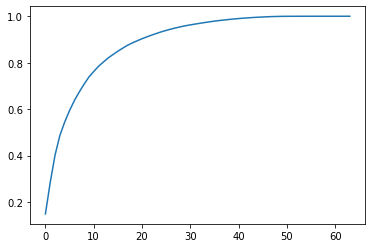

In [8]:
# 표준화하지 않은 원본 데이터를 사용합니다.
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## 9.2 선형적으로 구분되지 않은 데이터의 차원 축소하기
선형적으로 구분되지 않은 데이터에서 차원을 축소하고 싶습니다.

kernel trick을 사용하는 주성분 분석의 확장을 사용하여 비선형 차원 축소를 수행합니다.

In [10]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# 방사 기저 함수(radius bases function, RBF)를 사용하여 커널 PCA를 적용합니다.
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


PCA는 특성 행렬의 차원을 축소할 수 있습니다(예를 들어 특성의 개수). 표준 PCA는 샘플을 선형적으로 투영하여 특성을 축소합니다. 데이터가 선형적으로 구분되면 (즉, 다른 클래스 사이에 직선이나 초평면(hyperplane)을 그릴 수 있다면) PCA가 잘 작동합니다. 그러나 데이터가 선형적으로  구분되지 않으면 (즉, 구부러진 결정 경계를 사용해서만 클래스를 나눌 수 있다면) 선형 변환이 잘 맞지 않습니다. 해결에서 사이킷런의 make_circles 함수를 사용하 두 개의 클래스를 가진 타깃 벡터와 두 개의 특성을 가진 모의 데이터셋을 만들었습니다. make_circles는 선형적으로 구분되지 않는 데이터를 만듭니다. 구체적으로 하나의 클래스가 다른 클래스 안에 둘러싸여 있습니다.

선형 PCA를 사용하여 데이터의 차원을 축소시킨다면 두 클래스가 첫 번째 주성분에 선형적으로 투영되기 때문에 서로 섞일 것입니다.

이상적으로는 차원을 축소하면서 두 클래스가 선형적으로도 구분되는 변환을 원합니다. 커널 PCA가 이 두 가지를 수행할 수 있습니다.

커널 함수는 선형적으로 구분되지 않는 데이터를 선형적으로 구분되는 고차원으로 투영시켜줍니다. 이를 커널 트릭이라 부릅니다. 커널 트릭의 상세한 내용을 이해하지 못해도 걱정하지 마세요. 그냥 커널은 데이터를 투영하는 다른 방법이라고 생각하면 됩니다. 사이킷런의 KernelPCA에 사용할 수 있는 커널이 여러 개가 있습니다. 이 커널 함수는 kernel 매개변수를 사용하여 지정합니다. 널리 사용되는 커널은 가우시안 방사 기저 함수 커널인 rbf입니다. 다른 함수로는 다항식 커널(poly), 시그모이드 커널(sigmoid)이 있습니다. 선형 투영(linear)으로 지정하면 표준 PCA와 동일한 결과를 만들 수도 있습니다.

커널 PCA의 단점은 설정할 매개변수가 많다는 것입니다. 예를 들어 레시피 9.1에서 n_components를 0.99로 설정하여 PCA가 분산의 99%를 유지하는 주성분의 개수를 선택했습니다. 커널 PCA에서는 이 옵션을 사용할 수 없습니다. 대신 주성분의 개수를 지정해야 합니다(예를 들면 n_components=1). 또한 커널 자체적으로 설정해야 할 하이퍼파라미터를 동반합니다. 예를 들어 방사 기저 함수는 gamma 값을 설정해야 합니다.

어떤 값을 설정해야 할까요? 시행착오를 거칠 수 밖에 없습니다. 구체적으로 여러 가지 커널과 매개변수 조합으로 머신러닝 모델을 여러 번 훈련시킬 수 있습니다. 가장 높은 예측 성능을 만드는 값의 조합을 찾습니다. 이런 방법에 대해서는 12장에서 자세히 배우겠습니다.

커널 트릭은 실제 고차원으로 데이터를 변환하지 않으면서 고차원 데이터를 다루는 듯한 효과를 냅니다. 커널 PCA는 고차원 공간에서 주성분으로 투영된 결과를 반환합니다. 실제 고차원 공간으로 변환하는 것은 아니기 때문에 PCA처럼 주성분을 얻을 수는 없습니다. 즉, components_ 속성이 정의되지 않습니다.

In [11]:
kpca.components_

AttributeError: 'KernelPCA' object has no attribute 'components_'

kernel 매개변수의 기본값은 linear입니다. gamma 매개변수는 rbf, poly, sigmoid 커널에서 사용하는 계수이고 기본값은 특성 개수의 역수입니다. degree 매개변수는 poly 커널에 사용하는 거듭제곱 수이고 기본값은 3입니다. coef0 매개변수는 poly와 sigmoid 커널에 사용되는 상수항으로 기본값은 1입니다. 이외에 cosine 커널이 있습니다. 각 커널의 수학 공식은 사이킷런 문서(http://bit.ly/2K16zkD)를 참고하세요.

## 9.3 클래스 분리를 최대화하여 특성 줄이기
분류 모델에 사용될 특성을 줄이고 싶습니다.

선형 판별 분석(linear discriminant analysis, LDA)을 사용하여 클래스를 최대한 분리하는 성분 축으로 특성을 투영합니다.

In [4]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


explained_variance_ratio_를 사용하여 각 성분이 설명하는 분산의 양을 확인할 수 있습니다. 해결에서는 하나의 성분이 분산의 99%를 설명합니다.


In [5]:
lda.explained_variance_ratio_

array([0.9912126])

LDA는 분류 알고리즘이지만 차원 축소에도 자주 사용되는 기법입니다. LDA는 특성 공간을 저차원 공간으로 투영한다는 점에서 주성분 분석(PCA)와 비슷합니다. PCA가 데이터에서 분산이 최대인 성분 축에만 관심이 있는 반면 LDA는 클래스 간의 차이를 최대화하는 추가적인 목적을 가집니다.

사이킷런에서 LDA는 LinearDiscriminantAnalysis 클래스에 구현되어 있습니다. n_components 매개변수에 원하는 특성의 개수를 지정합니다. 필요한 n_components의 값을 알기 위해서는 만들어진 각 특성이 설명하는 분산을 크기순으로 정렬한 explained_variance_ratio_를 참고할 수 있습니다.

In [5]:
lda.explained_variance_ratio_

array([0.9912126])

특히 n_components를 None으로 지정하여 LinearDiscriminantAnalysis를 실행할 수 있습ㅂ니다. 모든 성분 특성에 의해 설명된 분산의 비율을 반환합니다. 그다음 설명된 분산의 임곗값을 넘기 위해 필요한 성분 개수를 계산합니다(주로 0.95나 0.99).

In [6]:
# LDA를 만들고 실행합니다.
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# 설명된 분산의 비율의 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var: float) -> int:
    
    # 설명된 분산의 초기값을 지정합니다.
    total_variance = 0.0
    
    # 특성 개수의 초깃값을 지정합니다.
    n_components = 0
    
    # 각 특성의 설명된 분산을 순회합니다.
    for explained_variance in var_ratio:
        
        # 설명된 분산 값을 누적합니다.
        total_variance += explained_variance
        
        # 성분 개수를 카운트합니다.
        n_components += 1
        
        # 설명된 분산이 목표치에 도달하면
        if total_variance >= goal_var:
            # 반복을 종료합니다.
            break
            
    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(lda_var_ratios, 0.95)

1

LDA는 PCA와 달리 타깃 벡터를 사용합니다. 참고 - 선형 판별 분석(http://bit.ly/2Fs4cWe)

## 9.4 행렬 분해를 사용하여 특성 줄이기
음수가 아닌 특성 행렬이 있을 때 차원을 축소하고 싶습니다.

비음수 행렬 분해(non-negative matrix factorization, NMF)를 사용하여 특성 행렬의 차원을 축소합니다.

In [7]:
from sklearn.decomposition import NMF
from sklearn import datasets

digits = datasets.load_digits()

features = digits.data

nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


C:\Users\dain\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF 선형 차원 축소를 위한 비지도 학습 기법입니다. 샘플과 특성 사이에 잠재되어 있는 관계를 표현하는 행렬로 특성 행렬을 분해합니다(즉, 곱해서 거의 원본 행렬이 되는 여러 개의 행렬로 나눕니다). 직관적으로 생각해서 행렬 곱셈에서 곱하는 행렬은 결과 행렬보다 훨씬 적은 차원을 가지기 때문에 NMF가 차원 축소할 수 있습니다. 이론적으로 원하는 특성 개수 $r$이 주어지면 NMF는 다음과 같이 특성 행렬을 분해합니다.

$$V \approx WH$$ 

여기에서 $V$는 $n\times d$ 크기의 특성 행렬입니다(즉, $n$개의 샘플, $d$개의 특성). $W$는 $n\times r$ 크기이고  $H$는 $r\times d$ 크기 행렬입니다. $r$ 값을 조절하여 필요한 차원 축소의 양을 정할 수 있습니다.

NMF의 중요한 필수 조건 하나는 이름이 의미하듯이 특성 행렬이 음수를 포함할 수 없습니다. 또한 PCA나 다른 기법과 달리 만들어진 특성의 설명된 분산을 제공하지 않습니다. 그러므로 n_components의 최적값을 찾는 가장 좋은 방법은 최종 모델에서 가장 좋은 결과를 내는 것을 찾아 여러 값을 시도해보는 것입니다.

$H$ 행렬은 components_ 속성에 저장되어 있고 $W$ 행렬이 변환된 데이터 features_nmf입니다.

In [8]:
nmf.components_.shape

(10, 64)

설명에서 언급한 것처럼 성분의 값은 모두 양수입니다.

In [10]:
import numpy as np

np.all(nmf.components_ >= 0)

True

원본 데이터를 복원하려면 변환된 행렬 $W$와 성분 행렬 $H$을 점곱합니다. 완변하게 복원되진 못하지만 두 행렬의 차이가 크지 않음을 알 수 있습니다.

In [11]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-0.1980674537396603

NMF 클래스의 solver 매개변수의 기본값은 cd로 좌표 하강법을 사용합니다. 사이킷런 0.19 버전에서 곱셈 업데이트 알고리즘인 mu 옵션이 추가되었습니다.

In [15]:
nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
features_nmf_mu = nmf_mu.fit_transform(features)

np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

-0.22082025790022908

## 9.5 희소한 데이터의 특성 줄이기
희소 특성 행렬의 차원을 추고하고 싶습니다.

TSVD(truncated singular value decomposition)를 사용합니다. 

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()

features = StandardScaler().fit_transform(digits.data)

features_sparse = csr_matrix(features)

tsvd = TruncatedSVD(n_components=10)

features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


TSVD는 PCA와 비슷합니다. 사실 PCA의 단계 중 하나에서 종종 기본 SVD 방식을 사용합니다. 기본 SVD에서 $d$개의 특성이 주어지면 SVD는 $d\times d$ 크기의 분해 행렬을 만듭니다. 반면 TSVD는 $n\times n$ 크기의 행렬을 만듭니다. $n$은 사전에 매개변수에서 지정한 값입니다. TSVD의 이점은 PCA와 달리 희소 특성 행렬에 사용할 수 있다는 것입니다.

TSVD의 이슈 하나는 난수 생성기를 사용하기 때문에 출력 부호가 훈련하는 사이에 뒤집힐 수 있다는 것입니다. 간단한 해결 방법은 전처리 파이프라인마다 한 번만 fit 메서드를 호출하는 것입니다. 그다음 여러 번 transform 메서드를 사용합니다.

선형 판별 분석처럼 n_components 매개변수를 사용하여 필요한 특성(성분)의 개수를 지정해야 합니다. 자연스럽게 최적의 성분 개수에 대한 질문이 발생합니다. 한 가지 전략은 n_components를 하이퍼파라미터로 모델 선택 과정에서 최적화하는 것입니다(즉 가장 좋은 훈련 모델을 만드는 n_components를 선택합니다). 또는 TSVD가 성분마다 원본 특성 행렬의 설명된 분산 비율을 제공하기 때문에 필요한 분산의 양을 설명할 수 있는 성분 개수를 선택할 수 있습니다(보통 95%나 99%). 예를 들어 해결에서 처음 세 개의 성분은 대략 원본 데이터의 30% 분산을 설명합니다.

In [19]:
tsvd.explained_variance_ratio_[0:3].sum()

0.3003938539111142

원본 특성 개수보다 하나 작게 n_components를 지정하고 TSVD를 실행하여 원하는 원본 데이터의 분산에서 설명된 양에 맞는 성분 개수를 계산하는 함수를 만들어 이 과정을 자동화할 수 있습니다.

In [23]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratios = tsvd.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var):
    
    # 설명된 분산을 초기화합니다.
    total_variance = 0.0
    
    # 특성 개수를 초기화합니다.
    n_components = 0
    
    # 특성의 설명된 분산을 순환합니다.
    for explained_variance in var_ratio:
                
        # 설명된 분산을 누적합니다.
        total_variance += explained_variance
        
        # 성분 개수를 카운트합니다.
        n_components += 1
        
        # 설명된 분산의 목표에 도달하면
        if total_variance >= goal_var:
            # 반복을 마칩니다.
            break
     
    # 성분 개수를 반환합니다.
    return n_components
            
# 함수를 실행합니다.
select_n_components(tsvd_var_ratios, 0.95)

40

자연어 처리에서는 TSVD를 잠재 의미 분석(latent sematic analysis, LSA)이라고도 부릅니다.

PCA는 최대 분산의 방향을 찾기 위해 원점에 맞춘 특성 행렬의 공분산 행렬에서 고유 벡터를 찾습니다. 이는 특성 행렬을 특잇값 분해(SVD)하여 얻은 특이 벡터와 같습니다. 따라서 특성 행렬을 원점에 맞추고 TSVD를 적용하면 PCA와 거의 같은 결과가 만들어집니다.

In [25]:
from sklearn.decomposition import PCA

features = digits.data - np.mean(digits.data, axis=0)

pca = PCA(n_components=40, random_state=1)
features_pca = pca.fit_transform(features)

tsvd = TruncatedSVD(n_components=40, random_state=1)
features_tsvd = tsvd.fit_transform(features)

np.max(np.abs(features_pca - features_tsvd))

0.002201522881548401

두 방식으로 변환된 행렬이 차이가 나지만 크지 않음을 알 수 있습니다. PCA 클래스의 svd_solver 매개변수가 기본값 auto이면 샘플의 개수가 500개 이하일 때 SVD 분해를 사용하는 full이 됩니다. 500개보다 크면 랜덤 SVD를 사용하는 randomized가 됩니다. TruncatedSVD의 algorithm 매개변수의 기본값은 랜덤 SVD를 의미하는 randomized입니다. 위 코드에서 랜덤한 알고리즘의 결과를 일정하게 만들기 위해 random_state를 지정했습니다.